In [1]:
%matplotlib notebook

In [2]:
import hyperspy.api as hs
import EELS.EELS as eels
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import copy 

In [3]:
def gauss(sigma, eRange):
    dE = eRange[1]-eRange[0]
    gx = np.arange(-3*sigma,3*sigma, dE)
    gaussian = np.exp(-0.5*(gx/sigma)**2)
    gaussian = gaussian/np.sum(gaussian)
    
    gauss =np.zeros((1,1,1,len(gaussian)))
    gauss[0,0,0,:] = gaussian
    return gauss

In [4]:
def smooth(s, sigma):
    hist = s.data
    scale = s.axes_manager['Energy'].scale
    offset = s.axes_manager['Energy'].offset
    size = s.axes_manager['Energy'].size

    eRange = np.linspace(offset, offset+(size-1)*scale, size)

    gaussian = gauss(sigma, eRange)
    
    crop_front = len(gaussian[0,0,0,:])//2
    if len(gaussian[0,0,0,:])%2 == 1:
        crop_end = crop_front
    else:
        crop_end = crop_front-1
        
    hist = convolve(hist, gaussian)
    
    s_smooth = copy.deepcopy(s)
    
    s_smooth.data = hist[:,:,:,crop_front:-crop_end]
    s_smooth.metadata['General']['title']  = s.metadata['General']['title'] + " smoothed"
    s_smooth.metadata['General']['name']  = s.metadata['General']['name'] + " smoothed"
    return s_smooth

In [10]:
def plotSignals(signals, colors=None, linestyles=None, plotstyle=None, fill=False, linewidth=None):
    
    s = signals[0]
    x_label = "{} [{}]".format(s.axes_manager.signal_axes[0].name,s.axes_manager.signal_axes[0].units)
    
    fig, ax = plt.subplots()
    ax.set_xlabel(x_label)
    ax.set_ylabel("Intensity [arb.]")
    
    if not linestyles:
        linestyles = []
        for i in range(len(signals)):
            linestyles.append('-')
    elif isinstance(linestyles,str):
        linestyles = [linestyles]

    if (len(linestyles) < len(signals)):
        for i in range(len(signals)-len(linestyles)):
            linestyles.append(linestyles[i])

    # REWRITE TO COLORS
    if not colors:
        standard_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
        colors = []
        for i in range(len(signals)):
            colors.append(standard_colors[2*i])
    elif isinstance(colors,str):
        colors = [colors]

    if (len(colors) < len(colors)):
        for i in range(len(signals)-len(colors)):
            colors.append(colors[i])

    if not linewidth:
        linewidth = 2;

    for i,s in enumerate(signals):
        x = s.axes_manager.signal_axes[0].axis
        y = s.sum().data
        label = s.metadata['General']['title']
        ax.plot(x,y,linestyles[i],color=colors[i], linewidth=linewidth, label=label)
        if fill:
            ax.fill_between(x,0,y,facecolor=colors[i],alpha=0.4)

            
    

In [5]:
def direct(s):

    # Ax0
    center = s.axes_manager.navigation_axes[0].size//2
    if (s.axes_manager.navigation_axes[0].size%2 == 0):
        z_s = center - 2
        z_e = center + 2
    else:
        z_s = center - 1
        z_e = center + 2
    
    # Ax1
    center = s.axes_manager.navigation_axes[1].size//2
    if (s.axes_manager.navigation_axes[1].size%2 == 0):
        y_s = center - 2
        y_e = center + 2
    else:
        y_s = center - 1
        y_e = center + 2

    # Ax0
    center = s.axes_manager.navigation_axes[2].size//2
    if (s.axes_manager.navigation_axes[2].size%2 == 0):
        x_s = center - 2
        x_e = center + 2
    else:
        x_s = center - 1
        x_e = center + 2
    
    p = s.inav[z_s:z_e,y_s:y_e,x_s:x_e]
    p.metadata["General"]["title"] = s.metadata["General"]["title"] + " direct"
    return p

In [25]:
s = hs.load("../Results/Cecilie/ZnO/41/T0F1.65.hspy")
p = hs.load("../Results/Cecilie/ZnO/41/T0F3.60.hspy")
q = hs.load("../Results/Cecilie/ZnO/41/T300F3.60.hspy")

In [31]:
s2 = smooth(s,0.05)
p2 = smooth(p,0.05)
q2 = smooth(q,0.05)

VBox(children=(HBox(children=(Label(value='q_z', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=38), BoundedFloatText(value=-0.5922418678388641, continuous_update=True, description='value', max=0.5922418678388641, min=-0.5922418678388641, step=0.031170624623098112), Label(value='AA-1', layout=Layout(width='5%')))), HBox(children=(Label(value='q_y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=72), BoundedFloatText(value=-1.103563284974185, continuous_update=True, description='value', max=1.103563284974185, min=-1.103563284974185, step=0.03065453569372736), Label(value='AA-1', layout=Layout(width='5%')))), HBox(children=(Label(value='q_x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=62), BoundedFloatText(value=-0.9557138394714498, continuous_update=True, description='value', max=0.9557138394714498, min=-0.9557138394714498, step=0.030829478692627414), Label(value='AA-1', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


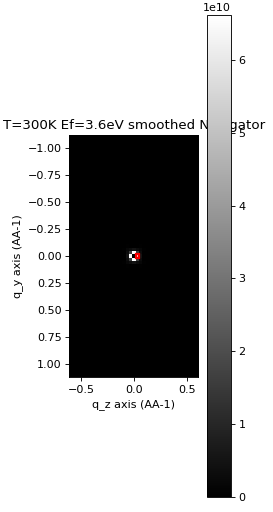

<IPython.core.display.Javascript object>


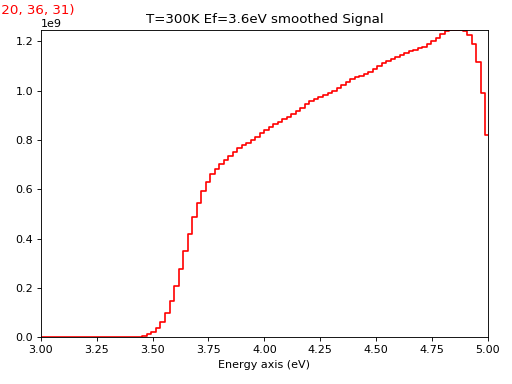

/home/sindrerb/anaconda3/envs/hySpy2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [45]:
q2.plot()

<IPython.core.display.Javascript object>


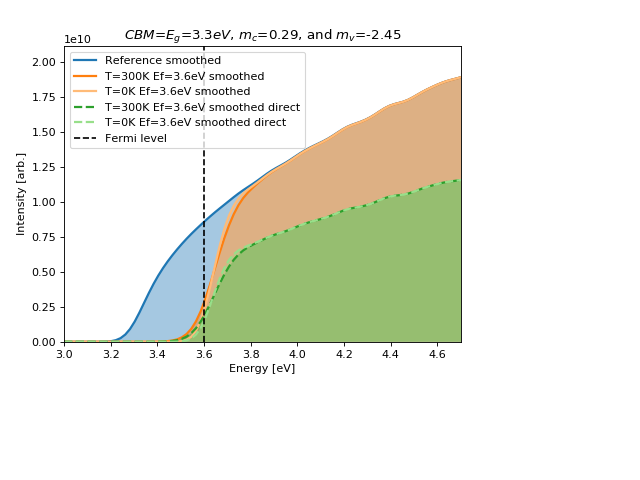

In [42]:
plotSignals([s2,q2,p2,direct(s=q2),direct(s=p2)], linestyles=['-','-','-','--','--'], colors=['#1f77b4', '#ff7f0e','#ffbb78', '#2ca02c', '#98df8a'], fill=True, linewidth=2)
plt.axvline(3.6, linestyle='--', color='black', label="Fermi level")
plt.title("$CBM$=$E_g$=3.3$eV$, $m_{c}$=0.29, and $m_{v}$=-2.45")
plt.xlim(3,4.7)
plt.ylim(0,)
plt.legend()
plt.savefig("../Figures/Parabolic_fermi_temp.png")
plt.show()

In [43]:
plt.savefig("../Figures/Parabolic_fermi_temp_smooth.png")

<IPython.core.display.Javascript object>


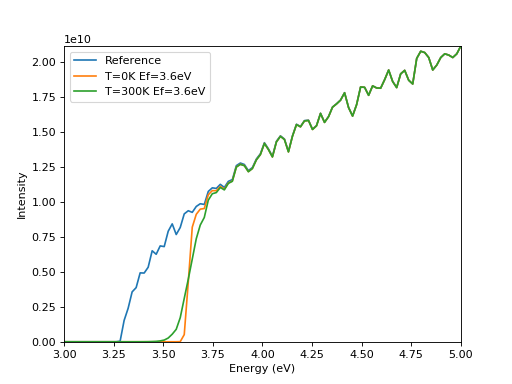

In [34]:
hs.plot.plot_spectra([s.sum(),p.sum(),q.sum()], legend='auto', legend_loc='best')#.figure.savefig("../Figures/Cecilie_300K.png")

In [42]:
s2 = smooth(s,0.05)
p2 = smooth(p,0.05)
q2 = smooth(q,0.05)
t2 = smooth(t,0.05)

<IPython.core.display.Javascript object>


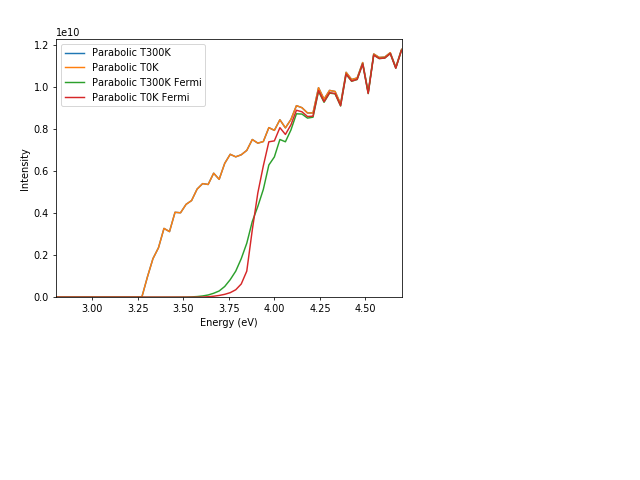

In [48]:
hs.plot.plot_spectra([s.sum(),t.sum(),p.sum(),q.sum()], legend='auto', legend_loc="best")

In [49]:
plt.xlim(2.8,4.7)

(2.8, 4.7)

In [50]:
plt.savefig("../Figures/Fermi_Temperatures.png")

<IPython.core.display.Javascript object>


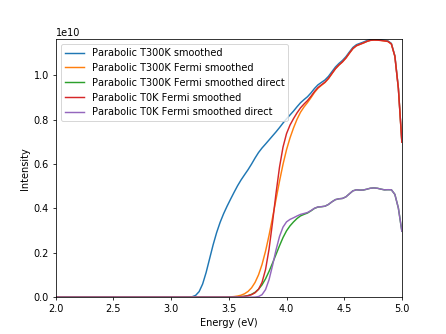

In [33]:
hs.plot.plot_spectra([s2.sum(),p2.sum(),direct(s=p2).sum(),q2.sum(),direct(s=q2).sum()], legend='auto', legend_loc="best")

<IPython.core.display.Javascript object>


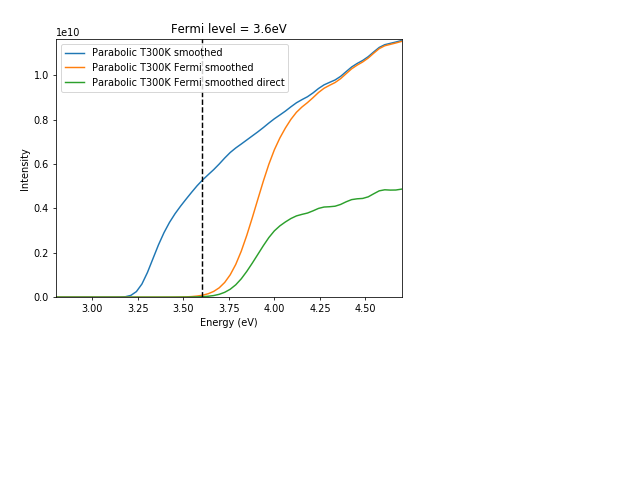

In [107]:
hs.plot.plot_spectra([s2.sum(),p2.sum(),direct(s=p2).sum()], legend='auto', legend_loc="best")

In [94]:
Eopt=p.axes_manager.signal_axes[0].axis[direct(s=q).sum().data>1e-5][0]
fermi = p.metadata['Sample']['system']['fermiEnergy']

In [108]:
plt.title('Fermi level = 3.6eV')
plt.axvline(x=fermi, linestyle='--', color='black')
#plt.axvline(x=Eopt, linestyle='--', color='black')
plt.xlim(2.8,4.7)

(2.8, 4.7)

In [109]:
plt.savefig('../Figures/Fermi_smooth_direct_T300K.png')

3.8484848484848468